<a href="https://colab.research.google.com/github/diptaban/PCA/blob/main/EigenFace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

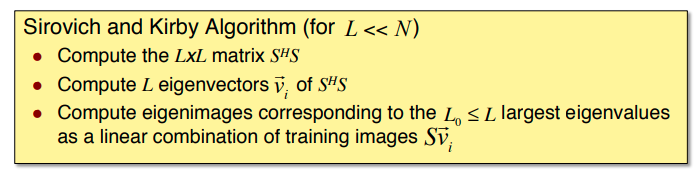

['George W Bush']
(530, 62, 47)


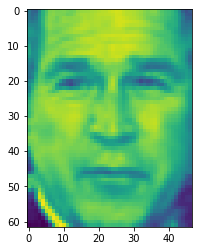

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
plt.grid(False)
faces = fetch_lfw_people(min_faces_per_person=500)
print(faces.target_names)
print(faces.images.shape)
plt.imshow(faces.images[0])

(530, 2914)

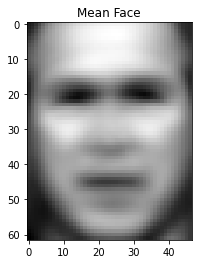

In [37]:
X = faces.images.reshape(faces.images.shape[0],faces.images.shape[1]*faces.images.shape[2])
mean_face = np.mean(X, axis=0)
mean_face.shape

plt.imshow(mean_face.reshape(faces.images.shape[1],faces.images.shape[2]),cmap='gray'); 
plt.title('Mean Face')

### normalization
faces_norm = X - mean_face
faces_norm.shape

In [38]:
# Calculate covariance matrix
face_cov = np.cov(faces_norm.T) #np.cov expects features as rows and observations as columns, so transposed
face_cov.shape


(2914, 2914)

In [39]:
eigen_vecs, eigen_vals, _ = np.linalg.svd(face_cov)

eigen_vecs.shape


(2914, 2914)

Text(0.5, 0.98, 'First 10 Eigenfaces')

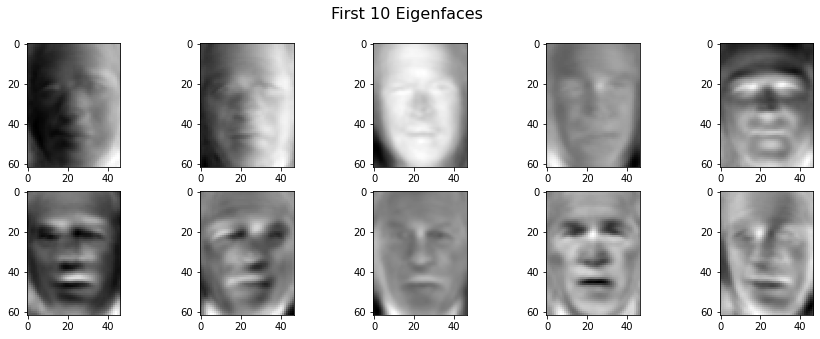

In [40]:
fig, axs = plt.subplots(1,3,figsize=(15,5))
for i in np.arange(10):
    ax = plt.subplot(2,5,i+1)
    img = eigen_vecs[:,i].reshape(62,47)
    plt.imshow(img, cmap='gray')
fig.suptitle("First 10 Eigenfaces", fontsize=16)

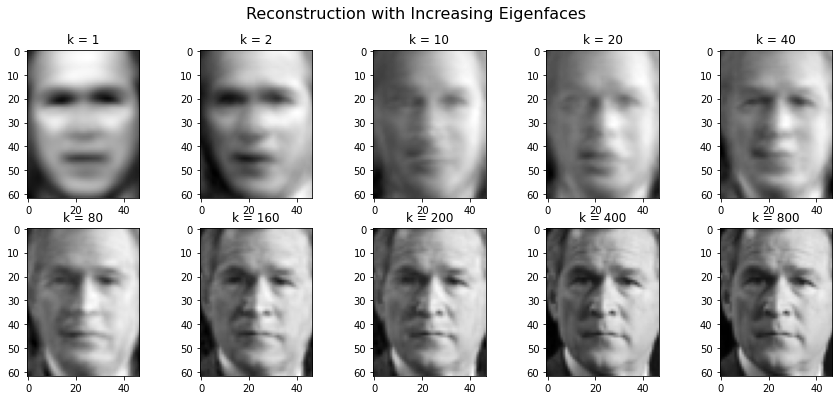

In [41]:
fig, axs = plt.subplots(2,5,figsize=(15,6))
for k, i in zip([0,1,9,19,39,79,159,199,399,799],np.arange(10)):
    # Reconstruct the first picture '1a.jpg' whose index is 0.
    weight = faces_norm[1,:].dot(eigen_vecs[:,:k]) # Get PC scores of the images
    projected_face = weight.dot(eigen_vecs[:,:k].T) # Reconstruct first face in dataset using k PCs
    ax = plt.subplot(2,5,i+1)
    ax.set_title("k = "+str(k+1))
    plt.imshow(projected_face.reshape(62,47)+mean_face.reshape(62,47),cmap='gray');
fig.suptitle(("Reconstruction with Increasing Eigenfaces"), fontsize=16);

# Another Approach

# Turk and Pentland Trick 

In actual Analysis of PCA , we compute the covariance matrix as 

$\Sigma = \Psi_{n\times m}^\top \Psi_{m\times n}$ such that the dimension of $\Sigma$ will be $n\times n$

If each image is of size $256 \times 256$ then the computation of covariance matrix will be HUGE. Hence instead of calculating $\Psi^\top \Psi$ we calculate here $L = \Psi\Psi^\top$ such that the size of $L$ will be $m\times m$ which is generally very lesser than $n=256\times 256 = 65536$ dimension.

So we calculate 

$L_{m\times m}=\Psi\Psi^\top$

Now , if $u$ is the eigen vector of $L$ then $\Psi^\top u$ will be the eigen vector of $\Sigma$

Proof: 

\begin{align}
Lu = \lambda u \\
\Psi\Psi^\top u = \lambda u \\
\Psi^\top (\Psi\Psi^\top u) = \Psi^\top \lambda u \\
 (\Psi^\top \Psi) \Psi^\top u = \lambda \Psi^\top u \\
let, v = \Psi^\top u  \\
\implies  (\Psi^\top \Psi) v = \lambda v \\
Now, \Sigma = \Psi^\top \Psi  \\
So, \Sigma v = \lambda v \\
or, \Sigma \Psi^\top u = λ \Psi^\top u\\
\end{align}

So, we compute the covariance matrix $L = \Psi\Psi^\top$ then calculate the eigenvector $u$ of $L$. Then find the actual eigenvector of $\Sigma = \textbf{v}$  as 

\begin{align}\textbf{v} = \Psi^\top \textbf{u}\end{align}



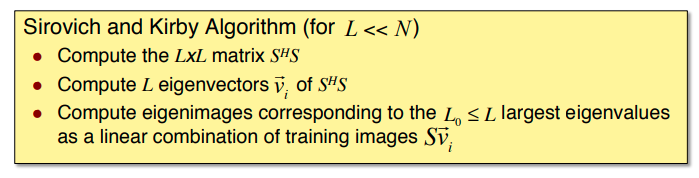

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


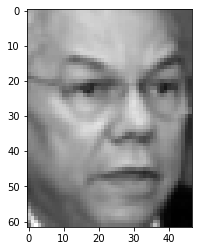

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
plt.grid(False)
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)
plt.imshow(faces.images[0],cmap='gray')
m = faces.images.shape[0]
n = faces.images.shape[1]*faces.images.shape[2]

(2914, 1348)

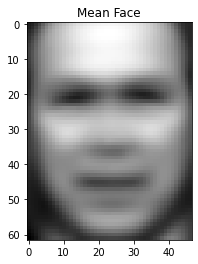

In [57]:
X = faces.images.reshape(faces.images.shape[0],faces.images.shape[1]*faces.images.shape[2])
X = X.T # Arrange X in shape = n,m 
# n = no. of features/pixels, m = no. of samples
x = faces.images.shape[1]
y = faces.images.shape[2]
mean_face = (np.mean(X, axis=1, keepdims=True))
plt.imshow(mean_face.reshape(faces.images.shape[1],faces.images.shape[2]),cmap='gray'); 
plt.title('Mean Face')

### normalization
faces_norm = X - mean_face
faces_norm.shape



Text(0.5, 0.98, 'Mean Subtracted Faces')

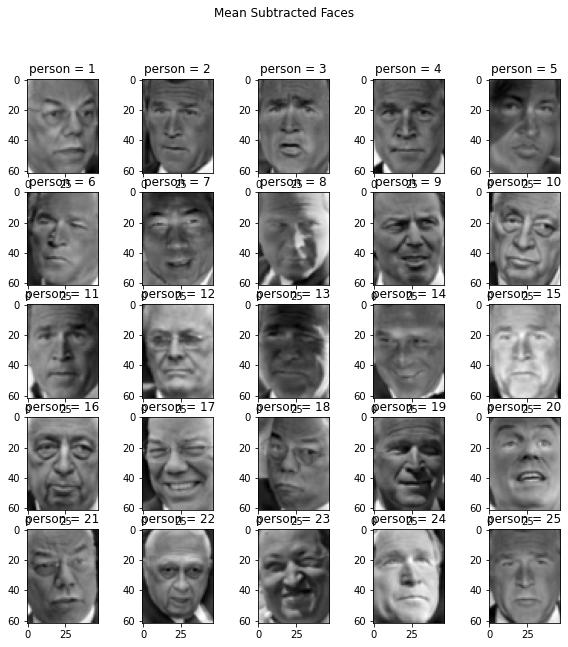

In [58]:
fig,axs = plt.subplots(2,5,figsize=(10,10))
for i in np.arange(1,26,1):
  ax = plt.subplot(5,5,i)
  ax.set_title("person = "+str(i))
  plt.imshow(faces_norm[:,i-1].reshape(x,y),cmap='gray')

fig.suptitle('Mean Subtracted Faces') 

In [61]:
L = (faces_norm.T.dot(faces_norm))/(X.shape[0]) #Shirovich ,Kirby Trick
L.shape # shape = m,m m = no.of samples
n=X.shape[0] # no. of features
eigen_vecs, eigen_vals, _ = np.linalg.svd(L)

eigen_vecs.shape # shape = m,m

u = faces_norm.dot(eigen_vecs) #  , Shape = n,m
k= 100 # no. of PCs
pc = u[:,:k] # Shape = n,k

# Normalization of EigenVector is must
for i in range(k):
  pc[:,i] = pc[:,i]/np.linalg.norm(pc[:,i])



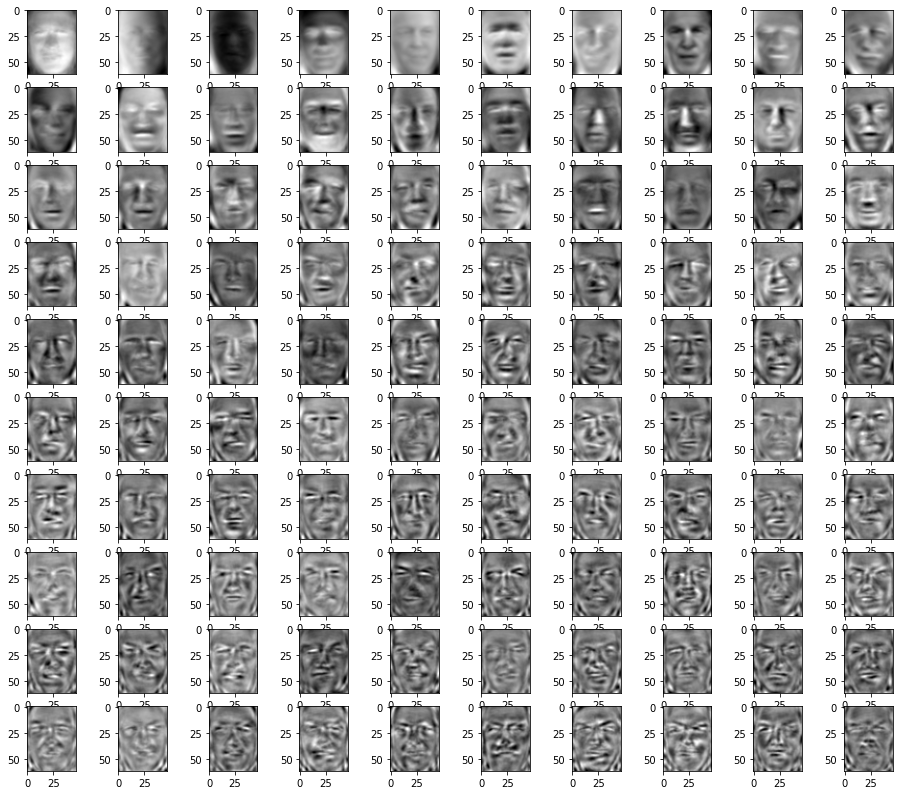

In [63]:
# EigenFaces
EfaceVectors = pc.T# shape = n x m , Eigenvectors are in col

EfaceImages = EfaceVectors.reshape(k,faces.images.shape[1],faces.images.shape[2])

samples=k

fig = plt.figure(figsize=(16,14))
for i in np.arange(1,samples+1,1):
  plt.subplot(round(np.sqrt(samples)),round(np.sqrt(samples)),i)
  plt.grid(False)
  plt.imshow(EfaceImages[i-1],cmap='gray')

# Single Image Reconstruction

Weights are calculated for each image as 

\begin{align}\textbf{w} = {\Psi}^\top \textbf{V}\end{align}

$\Psi$ contains all mean subtracted images along columns. hence transposed. And then projected on to the eigenvectors.

After getting the weights we can then reconstruct the image by the help of weights and basis vectors. here basis vectors are nothing but the eigenvectors. For reconstruction we need weighted linear combination of eigenvectors. Say image $x^{(1)}$ is projected on the eigenspace ( a space made of eigenvectors) and $\textbf{w}^{(1)}$ weights are generated. If there are $k$ components then there will be definitely $k$ no. of elements in $\textbf{w}^{(1)}$. such as 

\begin{align}\textbf{w}^{(1)} = [{w_1}^{(1)},{w_2}^{(1)},...,{w_k}^{(1)}]\end{align}
$\mathbf{w}^{(1)}$ is the weight vector associated with $x^{(1)}$

Now we have the eigenvector matrix as 
\begin{align}
\textbf{V}_{n\times k}=[\textbf{v}^{(1)},\textbf{v}^{(2)},...,\textbf{v}^{(k)}]
\end{align}

where, $\textbf{v}^{(1)}$ is a column vector of size $n\times 1$, i.e. $\textbf{v}^{(1)} = \begin{bmatrix} v_1^{(1)}\\ v_2^{(1)}\\ \vdots \\v_n^{(1)} \end{bmatrix}$

For reconstruction of single image $x^{(1)}$ we need the following linear combination as

\begin{align}r^{(1)} = w^{(1)}_1 \mathbf{v}^{(1)}+w^{(1)}_2 \mathbf{v}^{(2)}+w^{(1)}_3 \mathbf{v}^{(3)}+\cdots  +w^{(1)}_k \mathbf{v}^{(k)} + mean
\end{align}

For example consider the following simple calculation
Say (2,1) is a vector in 2D space where x y are the two coordinates ; act like basis vectors (1,0) for x  and (0,1) for y. now the vector (2,1) is projected on both x and y ; in result we get two weights for this sample vector (2,1). projecting on x gives weight = 2 and projecting on y gives weight = 1. 
\begin{align}\mathbf{w}=[w_1, w_2]=[2, 1]\end{align}


Now to reconstruct theoriginal sample vector (2,1) we need the following linear combination 

\begin{align} w_1 \begin{bmatrix}1\\0\end{bmatrix} + w_2  \begin{bmatrix}0\\1\end{bmatrix} \end{align}





-1143.0278


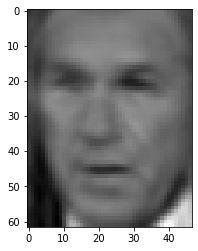

In [64]:
rec = np.zeros((n,1))
#proj = (faces_norm[:,1].T.dot(pc)).reshape(k,1)
## Now project the mean subtracted image vector on eigenspace (i.e.on pc) to get the weights
weights = faces_norm.T.dot(pc) # Shape of pc = n,k. Shape of faces_norm = n,m, Shape of proj = m,k
#rec =  mean_face + pc.dot(weights.T) 
print(weights[0,0])
# Calculation of Linear Combination
for i in range(k):
  rec += (weights[1,i] * pc[:,i]).reshape(2914,1)

rec = mean_face + rec
R = rec.reshape(faces.images.shape[1],faces.images.shape[2])
plt.imshow(R,cmap='gray')

# Reconstruction of Multiple images

 Reconstructed for k = 100 components


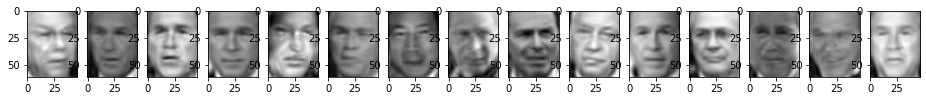

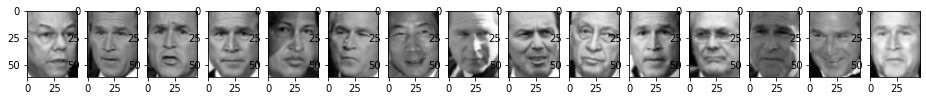

In [71]:
## Now project the mean subtracted image vector on eigenspace (i.e.on pc) to get the weights
weights = faces_norm.T.dot(pc) # Shape of pc = n,k. Shape of faces_norm = n,m, Shape of proj = m,k
rec =  mean_face + pc.dot(weights.T) 

fig = plt.figure(figsize=(16,10))

for i in range(15):
  R = rec[:,i].reshape(faces.images.shape[1],faces.images.shape[2])
  plt.subplot(1,15,i+1)
  plt.imshow(R,cmap='gray')

fig = plt.figure(figsize=(16,10))
for i in range(15):
  O = X[:,i].reshape(faces.images.shape[1],faces.images.shape[2])
  plt.subplot(1,15,i+1)
  plt.imshow(O,cmap='gray')

print(' Reconstructed for k = 100 components')

# EigenFace Function
    kirbyPCA(data,k)

##Note:  <font color='red'> The 'data' should be in shape  </font>


# \begin{align} m , x , y \end{align}

## <font color = 'green'>m = num of samples </font>

## <font color = 'green'>n = num of features or pixels = $x\times y$ </font>


In [49]:
def kirbyPCA(data,k): # k = number of principal components
  
  x = data.shape[1]
  y = data.shape[2]
  
  X = data.reshape(data.shape[0],data.shape[1]*data.shape[2]) # X in shape (m,n)
  X = X.T # now X shape = n,m
  mean_face = (np.mean(X, axis=1, keepdims=True))
  plt.imshow(mean_face.reshape(data.shape[1],data.shape[2]),cmap='gray'); 
  plt.title('Mean Face')

  faces_norm = X - mean_face
  fig,axs = plt.subplots(2,5,figsize=(10,8))
  
  for i in np.arange(1,26,1):
    ax = plt.subplot(5,5,i)
    ax.set_title("person = "+str(i))
    plt.imshow(faces_norm[:,i-1].reshape(x,y),cmap='gray')
  #fig.suptitle('Mean Subtracted Faces') 
  

  if(X.shape[0] > X.shape[1]): # if n > m, Covar matrix size = m,m
    L = (faces_norm.T.dot(faces_norm))/(X.shape[0]) #Shirovich ,Kirby Trick
    L.shape # shape = m,m m = no.of samples
    n=X.shape[0] # no. of features

    eigen_vecs, eigen_vals, _ = np.linalg.svd(L)

    eigen_vecs.shape # shape = m,m

    u = faces_norm.dot(eigen_vecs) #  , Shape = n,m
    
    pc = u[:,:k] # Shape = n,k
  else: # if n < m Covar matrix size will be n,n
    L = (faces_norm.dot(faces_norm.T))/(X.shape[0]) #Shirovich ,Kirby Trick
    L.shape # shape = m,m m = no.of samples
    n=X.shape[0] # no. of features

    eigen_vecs, eigen_vals, _ = np.linalg.svd(L)

    eigen_vecs.shape # shape = m,m

    u = eigen_vecs #  , Shape = n,m
    
    pc = u[:,:k] # Shape = n,k


  # Normalization of EigenVector is must
  for i in range(k):
    pc[:,i] = pc[:,i]/np.linalg.norm(pc[:,i])
  
  # EigenFaces
  EfaceVectors = pc.T# shape = n x m , Eigenvectors are in col

  EfaceImages = EfaceVectors.reshape(k,faces.images.shape[1],faces.images.shape[2])

  samples=25

  fig = plt.figure(figsize=(10,10))
  plt.tight_layout(pad=0, w_pad=0, h_pad=0)
  for i in np.arange(1,samples+1,1):
    plt.subplot(int(np.sqrt(samples)),int(np.sqrt(samples)),i)
    plt.grid(False)
    plt.imshow(EfaceImages[i-1],cmap='gray')
  fig.suptitle('EigenFaces')

  ## Now project the mean subtracted image vector on eigenspace (i.e.on pc) to get the weights
  weights = faces_norm.T.dot(pc) # Shape of pc = n,k. Shape of faces_norm = n,m, Shape of proj = m,k
  rec =  mean_face + pc.dot(weights.T) 

  fig, ax = plt.subplots(2, 10, figsize=(16, 4.5),
                          subplot_kw={'xticks':[], 'yticks':[]},
                          gridspec_kw=dict(hspace=0.1, wspace=0.1))
  for i in range(10):
      R = rec[:,i].reshape(data.shape[1],data.shape[2])
      O = X[:,i].reshape(data.shape[1],data.shape[2])
      ax[0, i].imshow(O, cmap='binary_r')
      ax[1, i].imshow(R, cmap='binary_r')
      
  ax[0, 0].set_ylabel('full-dim\ninput')
  ax[1, 0].set_ylabel(str(k)+'-dim\nreconstruction'); 



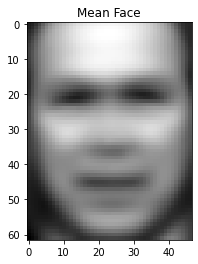

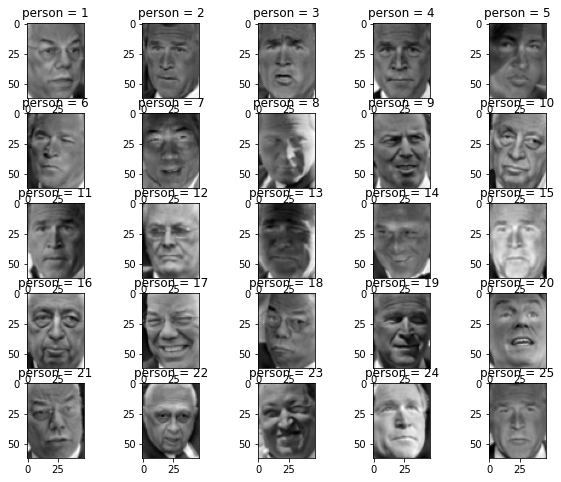

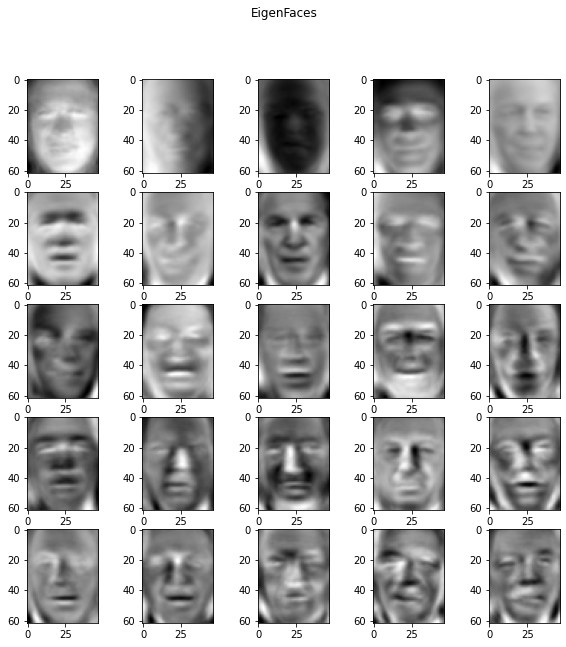

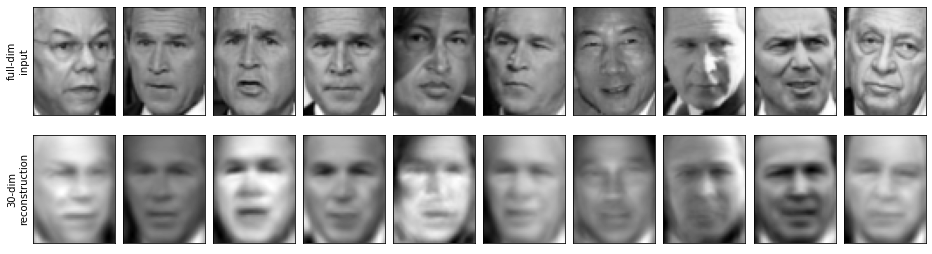

In [50]:
data = faces.images # Shape of data = m,x,y
# m = no of samples
# n = x * y , no of features 
kirbyPCA(data,30)

# Class of EigenFace
    pca = kirbyPCA(data,k)

##Note:  <font color='red'> The 'data' should be in shape  </font>

# \begin{align} m , x , y \end{align}

## <font color = 'green'>m = num of samples </font>

## <font color = 'green'>n = num of features or pixels = $x\times y$ </font>

## k : no. of principal components

In [51]:
class kirbyPCA:
  def __init__(self,data,k):
    self.data = data
    self.k = k
    print('To see the mean face : show_meanface()')
    print('To see the eigen faces : eigenfaces()')
    print('To see the reconstructed faces : reconstruction()')
    print('To get the principal components : pComponents()')
    
  def face_norm(self):
    self.X = (self.data.reshape(self.data.shape[0],self.data.shape[1]*self.data.shape[2])).T # X in shape n,m 
    self.m = (np.mean(self.X, axis=1, keepdims=True))
    self.mean_sub = self.X-self.m
    #return self.mean_sub

  def show_meanface(self):
    self.face_norm()
    plt.imshow(self.m.reshape(self.data.shape[1],self.data.shape[2]),cmap='gray'); 
    plt.title('Mean Face')
  
  def pComponents(self):
    self.face_norm()
    if(self.X.shape[0]>self.X.shape[1]): 
      self.L = (self.mean_sub.T.dot(self.mean_sub))/(self.X.shape[0]) #Shirovich ,Kirby Trick
      self.L.shape # shape = m,m m = no.of samples
      #n=self.X.shape[0] # no. of features
      self.eigen_vecs, self.eigen_vals, _ = np.linalg.svd(self.L)

      self.eigen_vecs.shape # shape = m,m

      self.u = self.mean_sub.dot(self.eigen_vecs) # 
      
      self.pc = self.u[:,:self.k] # Shape = n,k
    else:
      self.L = (self.mean_sub.dot(self.mean_sub.T))/(self.X.shape[0]) #Shirovich ,Kirby Trick
      self.L.shape # shape = m,m m = no.of samples
      #n=self.X.shape[0] # no. of features
      self.eigen_vecs, self.eigen_vals, _ = np.linalg.svd(self.L)

      self.eigen_vecs.shape # shape = m,m

      self.u = self.eigen_vecs # 
      
      self.pc = self.u[:,:self.k] # Shape = n,k


    # Normalization of EigenVector is must
    for i in range(self.k):
      self.pc[:,i] = self.pc[:,i]/np.linalg.norm(self.pc[:,i])

    #return self.pc

  def eigenfaces(self):
    self.pComponents()

    self.EfaceVectors = self.pc.T# shape = n x m , Eigenvectors are in col

    self.EfaceImages = self.EfaceVectors.reshape(self.k,self.data.shape[1],self.data.shape[2])

    fig = plt.figure(figsize=(6,4))
    for i in np.arange(1,self.k+1,1):
      plt.subplot(round(np.sqrt(self.k)),round(np.sqrt(self.k)),i)
      plt.grid(False)
      plt.imshow(self.EfaceImages[i-1],cmap='gray')

       

  def reconstruction(self):
    self.pComponents()

    ## Now project the mean subtracted image vector on eigenspace (i.e.on pc) to get the weights
    self.weights = self.mean_sub.T.dot(self.pc) # Shape of pc = n,k. Shape of faces_norm = n,m, Shape of proj = m,k

    self.rec =  self.m + self.pc.dot(self.weights.T) 
    
    fig, ax = plt.subplots(2, 10, figsize=(16, 4.5),
                          subplot_kw={'xticks':[], 'yticks':[]},
                          gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i in range(10):
        self.R = self.rec[:,i].reshape(self.data.shape[1],self.data.shape[2])
        self.O = self.X[:,i].reshape(self.data.shape[1],self.data.shape[2])
        ax[0, i].imshow(self.O, cmap='binary_r')
        ax[1, i].imshow(self.R, cmap='binary_r')
        
    ax[0, 0].set_ylabel('full-dim\ninput')
    ax[1, 0].set_ylabel(str(self.k)+'-dim\nreconstruction'); 
    
    
    #return self.R



['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']
(1140, 62, 47)
To see the mean face : show_meanface()
To see the eigen faces : eigenfaces()
To see the reconstructed faces : reconstruction()
To get the principal components : pComponents()
To see the mean face : show_meanface()
To see the eigen faces : eigenfaces()
To see the reconstructed faces : reconstruction()
To get the principal components : pComponents()
To see the mean face : show_meanface()
To see the eigen faces : eigenfaces()
To see the reconstructed faces : reconstruction()
To get the principal components : pComponents()
To see the mean face : show_meanface()
To see the eigen faces : eigenfaces()
To see the reconstructed faces : reconstruction()
To get the principal components : pComponents()


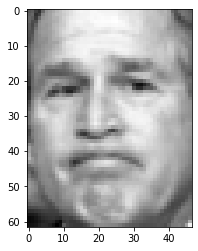

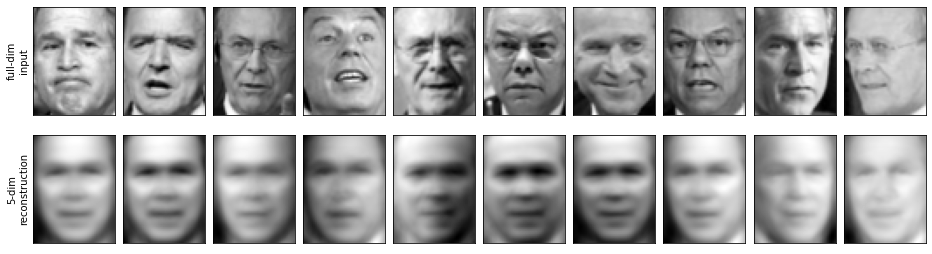

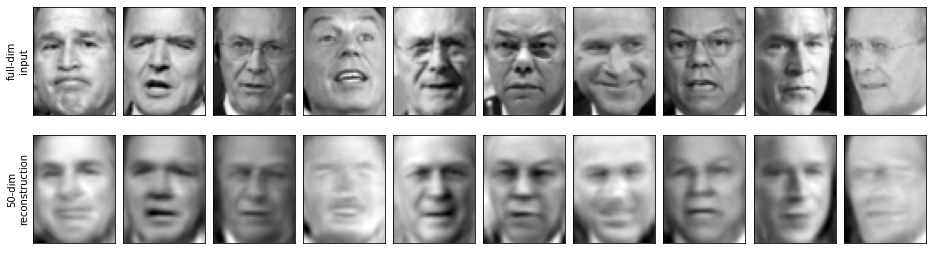

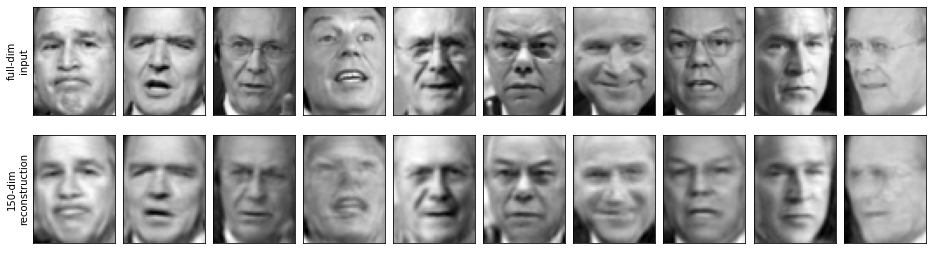

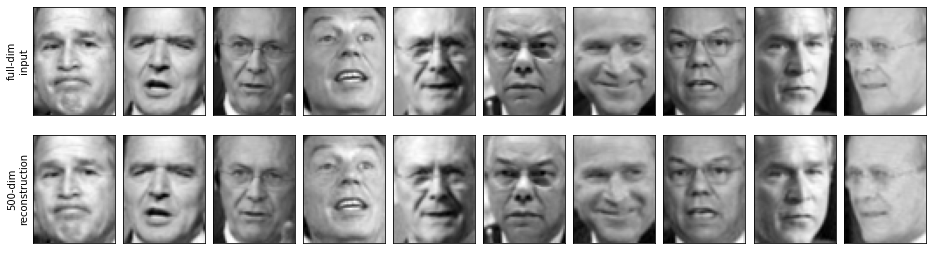

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
plt.grid(False)
faces = fetch_lfw_people(min_faces_per_person=100)
print(faces.target_names)
print(faces.images.shape)
plt.imshow(faces.images[0],cmap='gray')
m = faces.images.shape[0]
n = faces.images.shape[1]*faces.images.shape[2]

X = faces.images.reshape(faces.images.shape[0],faces.images.shape[1]*faces.images.shape[2])
#X = X.T # Arrange X in shape = n,m 

pca1 = kirbyPCA(faces.images,5)
pca1.reconstruction()
pca2 = kirbyPCA(faces.images,50)
pca2.reconstruction()
pca3 = kirbyPCA(faces.images,150)
pca3.reconstruction()
pca4 = kirbyPCA(faces.images,500)
pca4.reconstruction()

# Testing PCA trick with small data

In [53]:
#Y = np.array([[4,5,6,7,8],[5,0,9,8,3],[0,1,4,9,7]]) 
import numpy as np

D = np.random.rand(40,10) # size of D is n,m , n = no. of features, m = no of samples
n,m = D.shape
M = np.mean(D,axis=1,keepdims=True)
p = D-M # size n,m
L = p.T.dot(p) # m,m
C = p.dot(p.T) # n,n

u,e,v =np.linalg.svd(C)

u1,e1,v1 = np.linalg.svd(L)
tu = D.dot(u1)

# Normalization of EigenVector is must
for i in range(m):
  tu[:,i] = tu[:,i]/np.linalg.norm(tu[:,i])

print(tu[:,1])
print(u[:,1])

[-0.26622882 -0.11337947  0.03305031 -0.05718385 -0.25546414  0.00243214
 -0.02134241 -0.29505906  0.1193943   0.03393468  0.09867939  0.00548207
  0.17518335  0.09407153 -0.19106546  0.18404218  0.14678942 -0.20115087
 -0.12522105 -0.07439186 -0.13528447 -0.22046186  0.07602474 -0.20637953
  0.02018012  0.24770494  0.08611817  0.25344766 -0.10214301  0.08646484
 -0.30014958 -0.24914216 -0.17050994  0.17371973 -0.07201767  0.08217331
 -0.17880899  0.12163667 -0.02311732  0.05957185]
[ 0.26622882  0.11337947 -0.03305031  0.05718385  0.25546414 -0.00243214
  0.02134241  0.29505906 -0.1193943  -0.03393468 -0.09867939 -0.00548207
 -0.17518335 -0.09407153  0.19106546 -0.18404218 -0.14678942  0.20115087
  0.12522105  0.07439186  0.13528447  0.22046186 -0.07602474  0.20637953
 -0.02018012 -0.24770494 -0.08611817 -0.25344766  0.10214301 -0.08646484
  0.30014958  0.24914216  0.17050994 -0.17371973  0.07201767 -0.08217331
  0.17880899 -0.12163667  0.02311732 -0.05957185]
